# PISA Data
## by Youssef Abdelkader

## Preliminary Wrangling

PISA stands for Programme for International Student Assessment which is a study aimed at assessing the scholar performance and educational level in various countries through student questionares and measuring the performance of 15-year-old students on various subjects.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df_pisa = pd.read_csv('D:/JupyterNotebooks/third_project/pisa2012.csv', encoding='latin-1')
df_pisa.head()

c:\users\youssef\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
df_pisa.info(), df_pisa.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


(None, 485490)

In [5]:
df_pisa2 = pd.DataFrame()
#grouping my features of interest into a different dataset
df_pisa2[['cntry', 'gender', 'age', 'lang', 'grade', 'Ltime', 'wealth', 'belonging', 'mother', 'father', 'books_num', 'atr_self','atr_Explaination', 'atr_Guesses', 'atr_Material', 'atr_Interest', 'atr_luck', 'desk_comp', 'laptop', 'tablet', 'internet', 'games_console', 'ebook_reader' ]]=df_pisa[['CNT', 'ST04Q01', 'AGE', 'LANGN','GRADE', 'LMINS', 'WEALTH', 'BELONG', 'ST11Q01', 'ST11Q02', 'ST28Q01', 'ST44Q01', 'ST44Q03', 'ST44Q04', 'ST44Q05', 'ST44Q07', 'ST44Q08','IC01Q01', 'IC01Q02', 'IC01Q03', 'IC01Q04','IC01Q05','IC01Q11']]
df_pisa2.head()

,cntry,gender,age,lang,grade,Ltime,wealth,belonging,mother,father,...,atr_Guesses,atr_Material,atr_Interest,atr_luck,desk_comp,laptop,tablet,internet,games_console,ebook_reader
0,Albania,Female,16.17,Albanian,0.0,NaN,-2.92,-1.18,Yes,Yes,...,Likely,Likely,Likely,Very Likely,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Female,16.17,Albanian,0.0,315.0,0.69,NaN,Yes,Yes,...,Slightly likely,Very Likely,Slightly likely,Likely,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Female,15.58,Albanian,-1.0,300.0,-0.23,NaN,Yes,Yes,...,Very Likely,Very Likely,Very Likely,Slightly likely,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Female,15.67,Albanian,-1.0,135.0,-1.17,NaN,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,Female,15.50,Albanian,-1.0,NaN,-1.17,2.63,Yes,Yes,...,Likely,Likely,Slightly likely,Very Likely,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_pisa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cntry             485490 non-null  object 
 1   gender            485490 non-null  object 
 2   age               485374 non-null  float64
 3   lang              481765 non-null  object 
 4   grade             484617 non-null  float64
 5   Ltime             282866 non-null  float64
 6   wealth            479597 non-null  float64
 7   belonging         313399 non-null  float64
 8   mother            460559 non-null  object 
 9   father            441036 non-null  object 
 10  books_num         473765 non-null  object 
 11  atr_self          314119 non-null  object 
 12  atr_Explaination  313405 non-null  object 
 13  atr_Guesses       312645 non-null  object 
 14  atr_Material      312996 non-null  object 
 15  atr_Interest      312970 non-null  object 
 16  atr_luck          31

Number of books is an object not an integer or a float. Further investigation is needed.

In [7]:
df_pisa2['books_num'].unique()

array(['0-10 books ', '201-500 books ', 'More than 500 books',
       '11-25 books ', '101-200 books ', '26-100 books ', nan],
      dtype=object)

I will need to change the value representations to work with the data of this colmn more easily. 

In [8]:
df_pisa2['laptop'].unique()

array([nan, 'Yes, and I use it', 'Yes, but I don\x92t use it', 'No'],
      dtype=object)

Since I would like to study the effects of specific technology usage on students' performance and grade, having the technology and not using it would be just assumed as a similar case to not having it. Same goes to all technologies in the dataframe starting from column 16 and ending at the last column.

In [9]:
#replacing some dataset values for convenience
for col in df_pisa2.columns[17:]:
    df_pisa2[col] = df_pisa2[col].str.replace('Yes, but I don\x92t use it','No')
    df_pisa2[col] = df_pisa2[col].str.replace('Yes, and I use it','Yes')
    

In [10]:
df_pisa2['laptop'].unique()

array([nan, 'Yes', 'No'], dtype=object)

all 'Yes, and I use it' values are now represented as just a 'Yes'; however, 'Yes, but I don\x92t use it' values are now represented as a 'No'.

In [11]:
df_pisa2['grade'].unique()

array([ 0., -1., -2.,  1., -3.,  2., nan,  3.])

Grades were calculated as a ratio with respect to the modal or most frequent grade in one's country. A negative grade means that the student's grade is below average or modal grade. A zero means that the students meets the modal grade of their country. A positive number means that the student is above average compared to his country.

In [12]:
df_pisa2['belonging'].describe()

count    313399.000000
mean         -0.022259
std           0.983503
min          -3.690000
25%          -0.740000
50%          -0.150000
75%           0.560000
max           2.630000
Name: belonging, dtype: float64

Belonging is also described as a realtive index.

In [13]:
df_pisa2['atr_luck'].unique()

array(['Very   Likely', 'Likely', 'Slightly likely', nan,
       'Not at all likely'], dtype=object)

In [14]:
#replacing some dataset values for convenience
for col in df_pisa2.columns[11:17]:
    df_pisa2[col] = df_pisa2[col].str.replace('Very   Likely', 'Very Likely')
    df_pisa2[col] = df_pisa2[col].str.replace('Not at all likely','Unlikely')
likeliness = ['Very Likely', 'Likely', 'Slightly likely', 'Unlikely'] #to be used in ordering my likeliness values
likeliness_type = pd.api.types.CategoricalDtype(categories=likeliness, ordered=True) 
#setting the ordered likeliness type to all columns of failure attributes
for col in df_pisa2.columns[11:17]:
    df_pisa2[col] = df_pisa2[col].astype(likeliness_type)

In [15]:
df_pisa2['atr_luck'].unique()

['Very Likely', 'Likely', 'Slightly likely', NaN, 'Unlikely']
Categories (4, object): ['Very Likely' < 'Likely' < 'Slightly likely' < 'Unlikely']

I have set a categorical order for the likeliness of the various attributes of failures.

In [16]:
df_pisa2['wealth'].describe()

count    479597.00000
mean         -0.33701
std           1.21530
min          -6.65000
25%          -1.04000
50%          -0.30000
75%           0.43000
max           3.25000
Name: wealth, dtype: float64

Wealth was calculated using the index of home possessions,  highest parental education, highest parental occupation. Since the home possessions that indicate wealth differ from country to country, the home items and their numbers used to assess this indexes were unique to each country.

In [17]:
df_pisa2['age'].unique()

array([16.17, 15.58, 15.67, 15.5 , 16.08, 15.83, 15.92, 16.  , 15.75,
       16.25, 15.33, 15.42, 16.33, 15.25, 15.17,   nan])

Variance in age is not so significant.

In [18]:
df_pisa2.isna().sum()

cntry                    0
gender                   0
age                    116
lang                  3725
grade                  873
Ltime               202624
wealth                5893
belonging           172091
mother               24931
father               44454
books_num            11725
atr_self            171371
atr_Explaination    172085
atr_Guesses         172845
atr_Material        172494
atr_Interest        172520
atr_luck            172116
desk_comp           188513
laptop              188422
tablet              189888
internet            188185
games_console       188903
ebook_reader        190372
dtype: int64

Since grade will be my most common variable and its NA rows are few, I will remove the NA values corresponding to the grade.

In [19]:
df_pisa2 = df_pisa2.dropna(axis=0, subset=['grade'])

In [20]:
df_pisa2.grade.isna().sum()

0

### What is the structure of your dataset?

The dataset contains 485490 students with 636 attributes from which I have chosen 21 attributes. Most of the data types are objects except for age, grade, wealth, and belonging which are floats.

### What is/are the main feature(s) of interest in your dataset?

I am the most interested in identifying some of the features that affect students' school performance to some degree of significance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think wealth and number of household books could have a great impact on the students' performance in school. Also, parents could act as a great supportive power for students in their school work. The relation between gender and school performance should be investigated. I believe that there would be a lot of confounders on the gender's part; so, we would not be able to fully grasp the relation between gender and grades. I do not think the students' ideology of what their failures should be attributed to would have a great impact on school performance; however, this area should be investigated for its impact. Also the technology possession of families and the students' consumption of these technologies should have an impact on the students' grades and performance to some extent. In addition, age variance is not so significant, so I do not expect a huge difference in grades according to age. How much the student belongs to their school and feels about it should also have some impact on their performance. 

## Univariate Exploration


In [21]:
base_color = sb.color_palette()[0]

In [22]:
valc_grades = df_pisa2['grade'].value_counts()
valc_grades[0],valc_grades.sum() 

(348298, 484617)

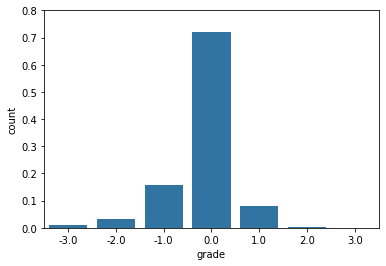

In [23]:
#plotting grade as a bar chart and setting the appropriate bins
max_pct = valc_grades[0]/valc_grades.sum()
percentiles = np.arange(0, max_pct+0.1, 0.1)
pct_names = ['{:0.1f}'.format(v) for v in percentiles]
g = sb.countplot(data = df_pisa2, x = 'grade', color = base_color)
pct_loc = valc_grades.sum()*percentiles
g.set_yticks(pct_loc);
g.set_yticklabels( pct_names);

Here, we can see that 70% of students actually succeed to meet the modal average of their respective countries. About 15% fail to meet the modal average by a factor of -1. And about 10% succeed to come above average by a factor of 1. Also, we can deduce that there are more students scoring below the modal average of their respective countries than those scoring above it.

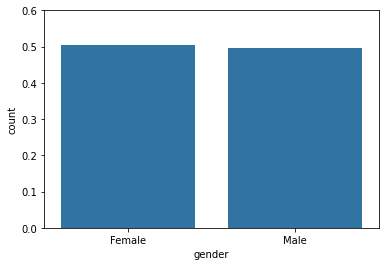

In [24]:
#plotting gender as a bar chart and setting the appropriate bins
valc_genders = df_pisa2['gender'].value_counts()
max_pct = valc_genders[0]/valc_genders.sum()
percentiles = np.arange(0, max_pct + 0.1, 0.1)
pct_names = ['{:0.1f}'.format(v) for v in percentiles]
g = sb.countplot(data = df_pisa2, x = 'gender', color = base_color)
pct_loc = valc_genders.sum()*percentiles
g.set_yticks(pct_loc);
g.set_yticklabels(pct_names);

Males and femals have almost the same percent of responses. This tells us that we could compare genders without worrying about sample size differences. I wonder how well do females scores with respect to males in different countries. See if that can tell us anything about the societal hardships imposed on different genders.

In [25]:
df_pisa2['wealth'].describe()

count    478759.000000
mean         -0.336399
std           1.215136
min          -6.650000
25%          -1.040000
50%          -0.300000
75%           0.430000
max           3.250000
Name: wealth, dtype: float64

(-6.0, 3.4)

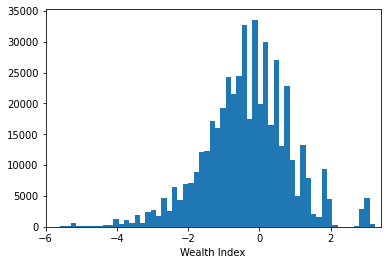

In [26]:
#plotting bins as a histogram
wealth_bins = np.arange(-6.65, 3.25+0.15, 0.15)
plt.hist(data = df_pisa2, x = 'wealth', bins = wealth_bins, color = base_color)
plt.xlabel('Wealth Index')
plt.xlim((-6, 3.25+0.15)) #removing a few outliers

The distribution is a little bit left skewed. Most of the students has a family wealth lower than their country's modal value for wealth. I wonder if those few above the modal value for wealth have a greater chance in surpassing the modal grade.

In [27]:
df_pisa2['belonging'].describe()

count    312901.000000
mean         -0.021934
std           0.983527
min          -3.690000
25%          -0.740000
50%          -0.150000
75%           0.560000
max           2.630000
Name: belonging, dtype: float64

Text(0.5, 0, 'belonging Index')

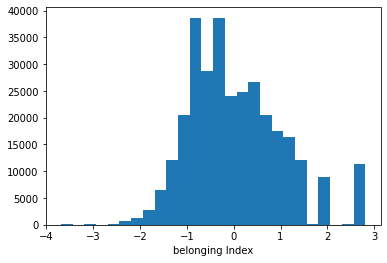

In [28]:
#plotting belonging index as a histogram
belongig_bins = np.arange(-3.69, 2.63+0.25, 0.25)
plt.hist(data = df_pisa2, x = 'belonging', bins = belongig_bins, color = base_color)
plt.xlabel('belonging Index')

There are two great spikes between -1 and 0 with two other great spikes at the right end of the plot. I wonder if belonging more correlates to higher grade indeces. Also, does having more technological devices at home separate the student from his school community and make him belong less? Does gender has any effect on the sense of belonging?

In [29]:
df_pisa2['age'].describe()

count    484502.000000
mean         15.784281
std           0.290240
min          15.170000
25%          15.580000
50%          15.750000
75%          16.000000
max          16.330000
Name: age, dtype: float64

Text(0.5, 0, 'age')

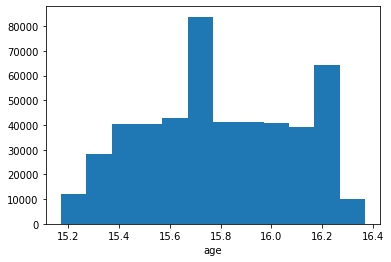

In [30]:
#plotting age as a histogram
age_bins = np.arange(15.17, 16.33+0.1, 0.1)
plt.hist(data = df_pisa2, x = 'age', bins = age_bins, color = base_color)
plt.xlabel('age')

Age seems to be distributed equally all over the range from about 15.4 to 16.2 except for that one huge spike in the middle at about the age of 15.7. There is also another big spike at the age of 16.3. I wonder if these small differences in age has any effect on the grade indeces of students.

In [31]:
df_pisa2['books_num'].value_counts()

26-100 books           135013
11-25 books             97121
0-10 books              94691
101-200 books           68304
201-500 books           49250
More than 500 books     28573
Name: books_num, dtype: int64

[Text(0, 0.0, '0.0'),
 Text(0, 47295.200000000004, '0.1'),
 Text(0, 94590.40000000001, '0.2'),
 Text(0, 141885.60000000003, '0.3')]

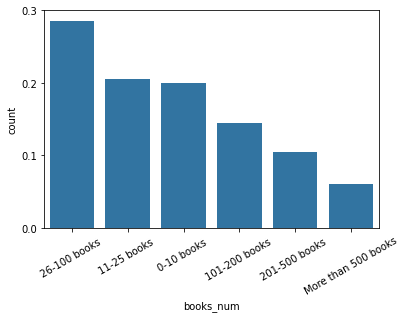

In [32]:
#setting the appropriate bins and plotting count of students according to book numbers categories
valc_books = df_pisa2['books_num'].value_counts()
max_pct1 = valc_books[0]/valc_books.sum()
percentiles = np.arange(0, max_pct1 + 0.1, 0.1)
pct_loc = valc_books.sum()*percentiles #location of y ticks
pct_names = ['{:0.1f}'.format(v) for v in percentiles] #labels of y ticks
g = sb.countplot(data = df_pisa2, x = 'books_num', color = base_color, order = valc_books.index)
g.set_xticklabels(g.get_xticklabels(), rotation = 30);
pct_loc = valc_books.sum()*percentiles
g.set_yticks(pct_loc)
g.set_yticklabels(pct_names)

A s we can see here, the most frequent number of books found in those students' households is in the 26 - 100 range while the least being in the range of above 500 books. I wonder if the number of books should strongly correlate with the grade indeces of corresponding students.

In [33]:
df_pisa2['Ltime'].describe()

count    282460.000000
mean        219.295175
std          97.993828
min           0.000000
25%         165.000000
50%         200.000000
75%         250.000000
max        2400.000000
Name: Ltime, dtype: float64

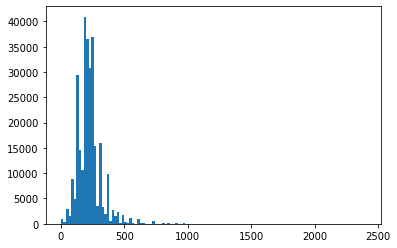

In [34]:
#plotting learning time as a histogram
bins_time = np.arange(0, 2400+10, 20);
plt.hist(data = df_pisa2, x ='Ltime', bins = bins_time, color = base_color);

As we notice here, the distribution is greatly right skewed due to probably some outlier that I should remove to get a better grasp of how the learning time is distributed over these students.

In [35]:
(df_pisa2['Ltime']>800).sum()

550

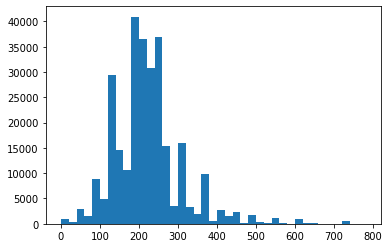

In [36]:
#plotting the learning time distribution again after removing outliers
bins_time = np.arange(0, 800, 20);
plt.hist(data = df_pisa2, x ='Ltime', bins = bins_time, color = base_color);

Most of these students study about 200 minutes per day. And there are more students who have study times smaller than 250 than there are studenst who have study times above 250. I wonder if the study time and grade index are related.

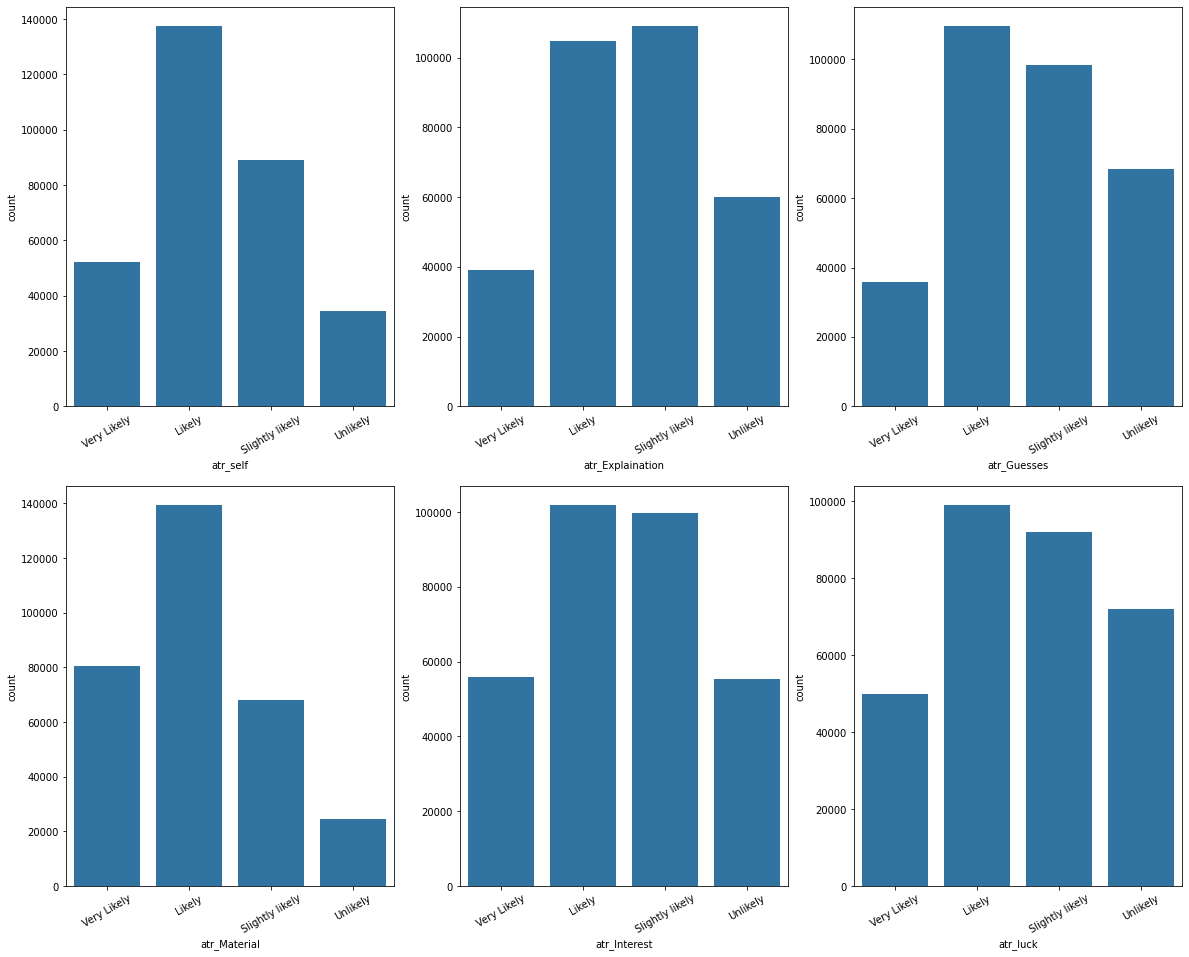

In [37]:
plt.figure(figsize=[20, 25])
i = 1
#plotting as much of failure attribute columns as there is
for col in df_pisa2.columns[11:17]: #the range of columns about failure attributes
    plt.subplot(3, 3, i)
    valc_atr = df_pisa2[col].value_counts()
    g = sb.countplot(data = df_pisa2, x = col, color = base_color)
    g.set_xticklabels(g.get_xticklabels(),rotation =30)
    i+=1

Here, we notice that students on average tend more to attribute their failure to the difficulty of the material rather than any other reason. In fact attributing failure to just not being good, in other words blaming one's self, as a likely contributor to failure nearly equals the frequency of attributing hard material as a likely reason to failure. The mostly attributed reason as being very likely is material difficulty. I wonder if students with different grade indeces tend to attribute their failure to different reasons.

In [38]:
means = []
df_pos = pd.DataFrame() #the dataframe where I would store the different percentiles of various technologies
for col in df_pisa2.columns[17:]: #the range of technology usage columns
    #replacing the 'Yes' and 'No' string values with binary values to calculate percentage of usage easier
    df_pisa2[col] = df_pisa2[col].str.replace('No','0') 
    df_pisa2[col] = df_pisa2[col].str.replace('Yes','1')
    df_pos[col] = df_pisa2[col]
df_pos['grade'] = df_pisa2['grade']
df_pos = df_pos.dropna(axis=0) #dropping the NaN values to change column types from object to integer
for col in df_pos.columns[0:6]:
    df_pos[col] = pd.to_numeric(df_pos[col]) #changing column type from object to integer
    #getting the mean of these binary columns and assigning them to the new dataframe:
    mean_col = df_pos[col].mean()
    means.append(mean_col)
means

[0.6825081640560138,
 0.6597179941329496,
 0.232737864615044,
 0.8746367686943045,
 0.5096238999280456,
 0.12419397243593291]

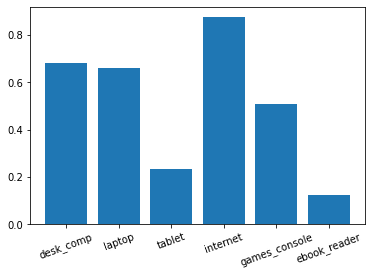

In [39]:
g = plt.bar( np.array(df_pos.columns[0:6]),means, color = base_color)
plt.xticks(rotation = 20);

> We notice that the most used technology is the internet followed by the dasktop computers and laptops. Ebook readers are the least used technology among these students. I wonder if different technology usage habits could affect the grade index of the corresponding student.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Age is distributed nearly equally, except for some spikes, over a discrete range of ages.
- The wealth distribution is a little bit left skewed with more students below the 0 index than those above it.
- 70% of all the grade indeces match the modal grade.
- The dataset contains nearly as much males as there are females.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, there were some unusual distributions since the learning time histogram plot was so right skewed because of outliers. I have limited the plot to a certain range to exclude these outliers.

## Bivariate Exploration


<AxesSubplot:xlabel='gender', ylabel='count'>

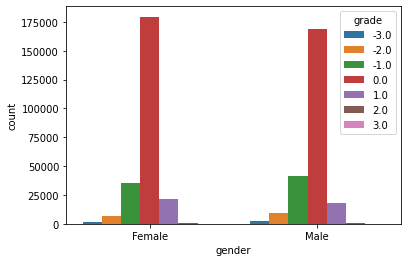

In [40]:
#plotting gender versus grade as a clustered bar chart
sb.countplot(data = df_pisa2, x = 'gender', hue = 'grade')

Here, we notice that females score slightly better on average than males. However, it is just a slight difference. Further investigation by adding in the country variable to those two above should be done in the multivariate section.

In [42]:
df_pisa2['books_num'].value_counts()

26-100 books           135013
11-25 books             97121
0-10 books              94691
101-200 books           68304
201-500 books           49250
More than 500 books     28573
Name: books_num, dtype: int64

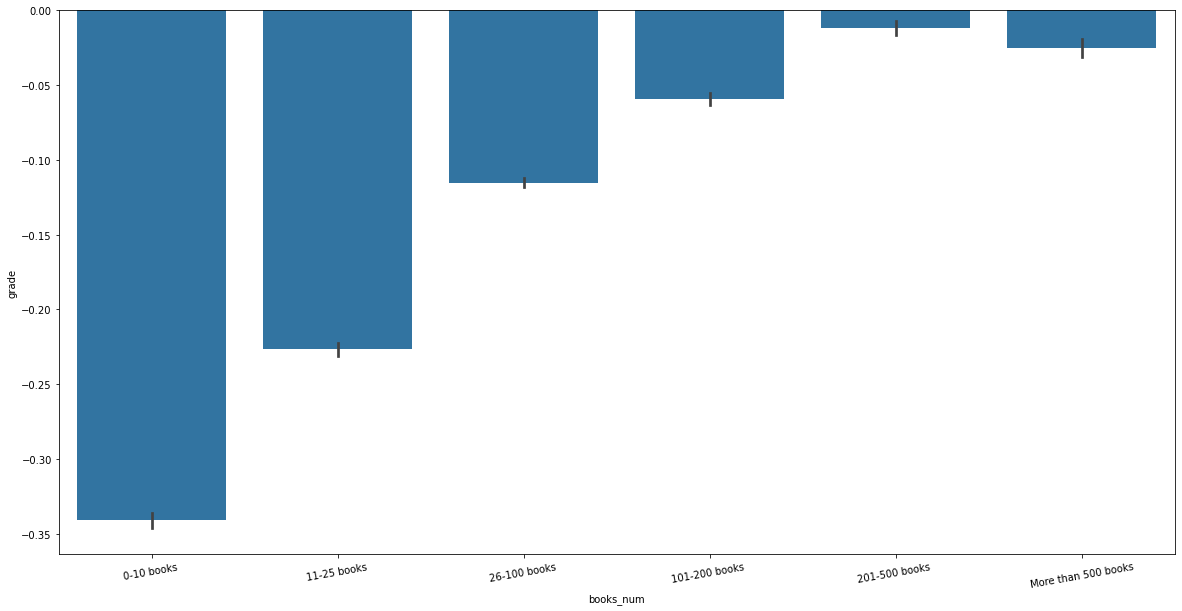

In [56]:
#plotting the number of books against the grade index
#assigning the order of x ticks to an array:
book_nums = ['0-10 books ', '11-25 books ','26-100 books ','101-200 books ','201-500 books ','More than 500 books']
plt.figure(figsize = [20, 10])
bin_gradesn  = ['{:0.2f}'.format(v) for v in bin_grades]
g = sb.barplot(data = df_pisa2, x = 'books_num', y = 'grade', color = base_color, order = book_nums)
g.set_xticklabels(g.get_xticklabels(),rotation =10);

In this adapted bar chart, We can notice a pattern here: grade index average increases as the number of books in the corresponding student's household increases. However, at More than 500 books there is an anomaly where the average grade index decreases again becoming less than the 201-500 books grade index average while still being greater than all other grade index averages. But the overall trend shows a positive correlation between the number of books present at home and the student's grade index. 

<AxesSubplot:>

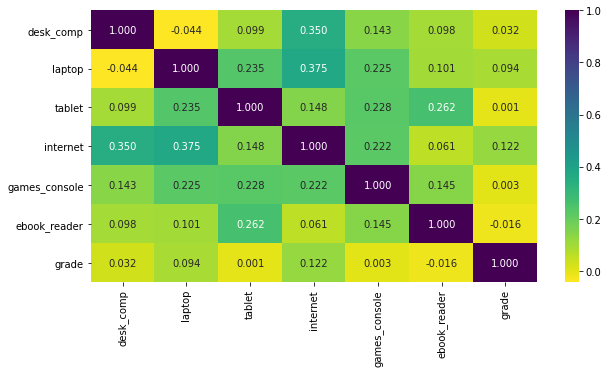

In [483]:
#plotting technology usage against grade in a heatmap
plt.figure(figsize = [10, 5])
sb.heatmap(df_pos[['desk_comp', 'laptop', 'tablet', 'internet', 'games_console', 'ebook_reader', 'grade']].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r')

The only one technology that its usage correlates with slight significance is the laptop and it correlates positively

<AxesSubplot:>

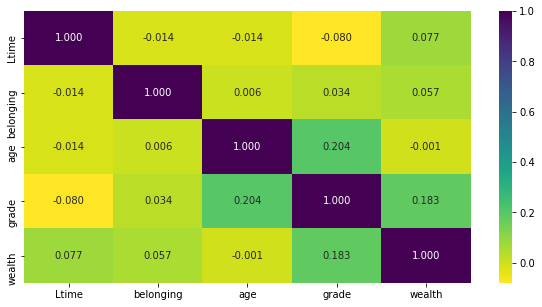

In [481]:
#Let's find some correlations between our variables of interest
plt.figure(figsize = [10, 5])
sb.heatmap(df_pisa2[['Ltime', 'belonging', 'age', 'grade', 'wealth',]].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r')

We can notice some significant correlation between grade and wealth, and grade and age. Further investigation is needed. Apparently too, learning time and grade are negatively correlated. 

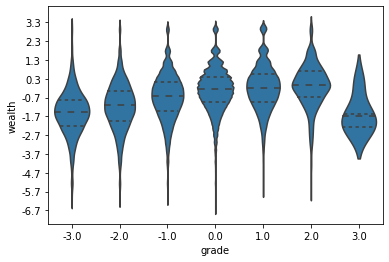

In [513]:
#plotting wealth against grade index
bin_wealth = np.arange(-6.65, 3.25+1, 1)
bin_wealthN = ['{:0.1f}'.format(v) for v in bin_wealth]
g = sb.violinplot(data = df_pisa2, x = 'grade', y ='wealth', inner = 'quartile',color = base_color )
g.set_yticks(bin_wealth);
g.set_yticklabels(bin_wealthN);

Here, we notice that as the grade index increases, the mean wealth increases until we reach the grade index of "3" where the wealth mean decreases significantly that even its upper quartile is lower than all of the means of the other violin plots.In the violin of grade index "3", there is nearly no students of wealth indeces higher than "2". Even though the wealth mean increases as the grade index increases, the means of violin plots do not get above the 0.3 wealth index. We can also deduce that for students of higher wealth indeces (1.3 < wealth index < 2.3), the relative frequency of getting a certain grade index increases as the grade index increases, until we reach a grade index of "3". For even higher wealth indeces 
(2.3 < wealth index < 3.3), the same trend follows but starts declining much earlier at a grade index of "2". Further investigation is needed.

In [829]:
#creating a dataframe that holds every wealth index range against the relative frequency of every grade index
indeces = ['3.3 > wealth >= 2.3', '2.3 > wealth >= 1.3', '1.3 > wealth >= 0.3', '0.3 > wealth >= -0.7', '-0.7 > wealth >= -1.7','-1.7 > wealth']
columns = ['-3', '-2', '-1', '0', '1', '2', '3']
wealth_grade = pd.DataFrame(index = indeces, columns = columns)
arr = [3.3, 2.3, 1.3, 0.3, -0.7, -1.7, -6.7] #an array to use in setting wealth limits
i = 0 #the index that will help navigate the above array
for row in wealth_grade.index:
    for col in wealth_grade.columns:
        col2 = int(col)
        #assigning the relative frequency of students of a specific grade and wealth index to the appropriate cell:
        wealth_grade.loc[[row], [col]] = df_pisa2.query('@arr[@i] >wealth>= @arr[@i+1] and grade == @col2').shape[0]/df_pisa2.query('@arr[@i] >wealth>= @arr[@i+1]').shape[0]
    i+=1
wealth_grade

,-3,-2,-1,0,1,2,3
3.3 > wealth >= 2.3,0.00204425,0.012025,0.101732,0.743506,0.138288,0.002405,0
2.3 > wealth >= 1.3,0.00151982,0.0118078,0.108141,0.762792,0.113129,0.00261097,0
1.3 > wealth >= 0.3,0.00198524,0.0138492,0.120938,0.770605,0.0896207,0.00300161,0
0.3 > wealth >= -0.7,0.00435151,0.0223726,0.142642,0.749533,0.0787101,0.00238463,5.80201e-06
-0.7 > wealth >= -1.7,0.0150063,0.0461106,0.186724,0.679275,0.0713627,0.00150332,1.78966e-05
-1.7 > wealth,0.0281779,0.0787935,0.239305,0.588216,0.0640456,0.00142604,3.61024e-05


In [830]:
wealth_grade = wealth_grade.drop(columns = ['0']) #dropping the 0 grade index bar because it is distracting

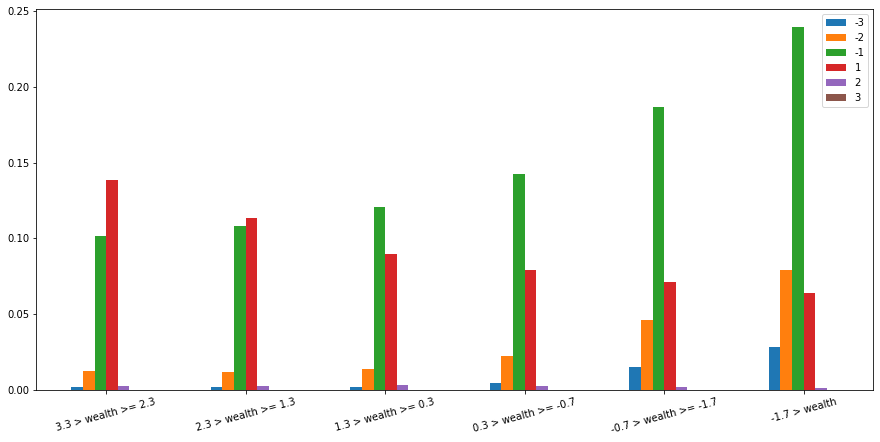

In [837]:
#plotting wealth index ranges against the relative frequencies of every grade index
g  = wealth_grade.plot(kind = 'bar', figsize = (15, 7))
plt.xticks(rotation = 15);

As we can notice here, the relative frequency of a grade index less than zero increases as the wealth index decreases. In addition, the relative frequency of a 1 or 2 grade index increases as the wealth index increases. However, the relative frequency of a grade index of three increases as the wealth index decreases until it reaches a wealth index range between 1.3 and 0.3 and then starts declining again.

In [559]:
#creating a dataframe of ages
df_ages = df_pisa2.copy()
df_ages = df_ages.age.dropna()
df_ages.unique()

array([16.17, 15.58, 15.67, 15.5 , 16.08, 15.83, 15.92, 16.  , 15.75,
       16.25, 15.33, 15.42, 16.33, 15.25, 15.17])

<AxesSubplot:xlabel='grade', ylabel='age'>

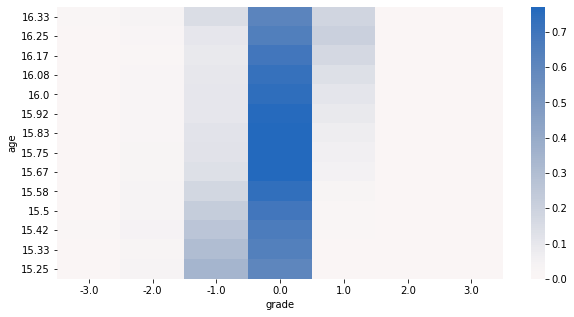

In [568]:
#plotting a heatmap of age versus the corresponding relative frequency of grade indeces
plt.figure(figsize=[10, 5])
age_grade = df_pisa2.groupby(['age','grade']).size()
age_grade = age_grade.reset_index(name = 'num')
age_grade = age_grade.pivot(index = 'age', columns = 'grade', values = 'num')
age_grade = age_grade.fillna(0)

#calculating relative frequancy:
#creating a sum column that holds the total of all other columns
age_grade['sum'] = age_grade[-3.0]+age_grade[-2.0]+age_grade[-1.0]+age_grade[0.0]+age_grade[1.0]+age_grade[2.0]+age_grade[3.0]
for col in age_grade[0:6]:
    age_grade[col] = age_grade[col]/age_grade['sum'] #changing the counts into relative frequencies
age_grade = age_grade.drop(columns=['sum'])
age_grade = age_grade.drop(labels = [15.17], axis = 0) #deleting this row because it only represents a single person
age_grade = age_grade.iloc[::-1] # reversing the indeces to have them from lower to higher when plotted
sb.heatmap(age_grade, cmap='vlag_r', center = 0)

We can notice that the relative frequency of students having a grade index of "1" decreases as the group age decreases. Also, the relative frequency of scoring a "-1" grade index icreases as the age decreases.

In [680]:
#creating a dataframe holding failure reasons against the mean grade of students grouped by likeliness attributed to that reason
indeces = ['atr_self', 'atr_Explaination','atr_Guesses','atr_Material','atr_Interest','atr_luck']
columns = ['Very Likely', 'Likely', 'Slightly likely', 'Unlikely']
data = pd.DataFrame(index = indeces, columns = columns)
for col in data.columns:
    for row in data.index:
        #assigning grade mean to the appropriate cell
        data.loc[[row], [col]] = df_pisa2[df_pisa2[row]==col].grade.mean()

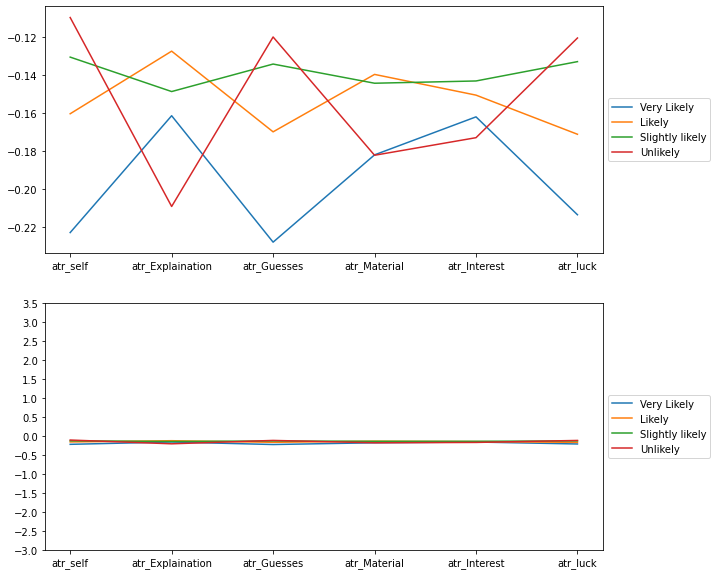

In [681]:
plt.figure(figsize=(10, 10))
bin_y = np.arange(-3, 4, 0.5)
plt.subplot(2,1, 1)
bin_ynames = ['{:0.2f}'.format(v) for v in bin_y]
plt.plot( data.index, data['Very Likely'], label = 'Very Likely') #plotting the 'Very Likely' line plot
plt.plot( data.index, data['Likely'], label = 'Likely') #plotting the 'Likely' line plot
plt.plot( data.index, data['Slightly likely'], label = 'Slightly likely') #plotting the 'Slightly likely' line plot
plt.plot( data.index, data['Unlikely'], label = 'Unlikely') #plotting the 'Unlikely' line plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plotting the same plot again but at a larger y tick scale to investigate significance of findings
plt.subplot(2, 1, 2)
bin_ynames = ['{:0.2f}'.format(v) for v in bin_y]
plt.plot( data.index, data['Very Likely'], label = 'Very Likely')
plt.plot( data.index, data['Likely'], label = 'Likely')
plt.plot( data.index, data['Slightly likely'], label = 'Slightly likely')
plt.plot( data.index, data['Unlikely'], label = 'Unlikely')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
bin_loc, labels = plt.yticks()
plt.yticks(bin_y);

The relation between different attributions to failure and grade index is very weak. However, if even so slightly, those who attributed their failure to the bad explaination of the teacher as very likely or likely had a higher mean of grade index. I do not think these findings are significant enough to keep investigating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Females seem to enjoy a slightly better performance in school than males according to grade indeces.
- A pattern deduced between the number of books at home and grade indeces suggest that, in general, as the number of books at a student's home increases their grade index increases.
- The wealth index increases as the grade index increases until we reach a grade index of 3
- Surprisingly, ages, even thogh they are of small variance, had a visible effect on the grades of the students. The relative frequency for a grade index higher than the modal grade increases as the age increases.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I have noticed the following:
- Most technologies correlate somewhat significantly with each other
- Having an internet connection correlates strongly with having a desktop computer or a laptop in a positive way
- To my surprise, having a desktop computer correlates negatively with having a laptop
- The tablet correlate most with the ebook reader which is sensible
- The two mostly correlated technoligies to the grade index are laptops and internet. And the both correlate positively to the grade index

## Multivariate Exploration


In [59]:
#preparing a dataframe to hold the country versus its corresponding grade index means of male and female genders
cntry_vcount = df_pisa2['cntry'].value_counts()
indeces = np.array(cntry_vcount.index)
columns = ['Male', 'Female']
data_cntry = pd.DataFrame(index = indeces, columns = columns)
for col in data_cntry.columns:
    for row in data_cntry.index:
        #assigning grade mean of students grouped by a certain country and gender to the appropriate cell
        data_cntry.loc[[row], [col]] = df_pisa2.query('cntry == @row and gender==@col').grade.mean()
data_cntry['cntry'] = data_cntry.index

In [60]:
data_cntry.loc[['Japan']]

,Male,Female,cntry
Japan,0,0,Japan


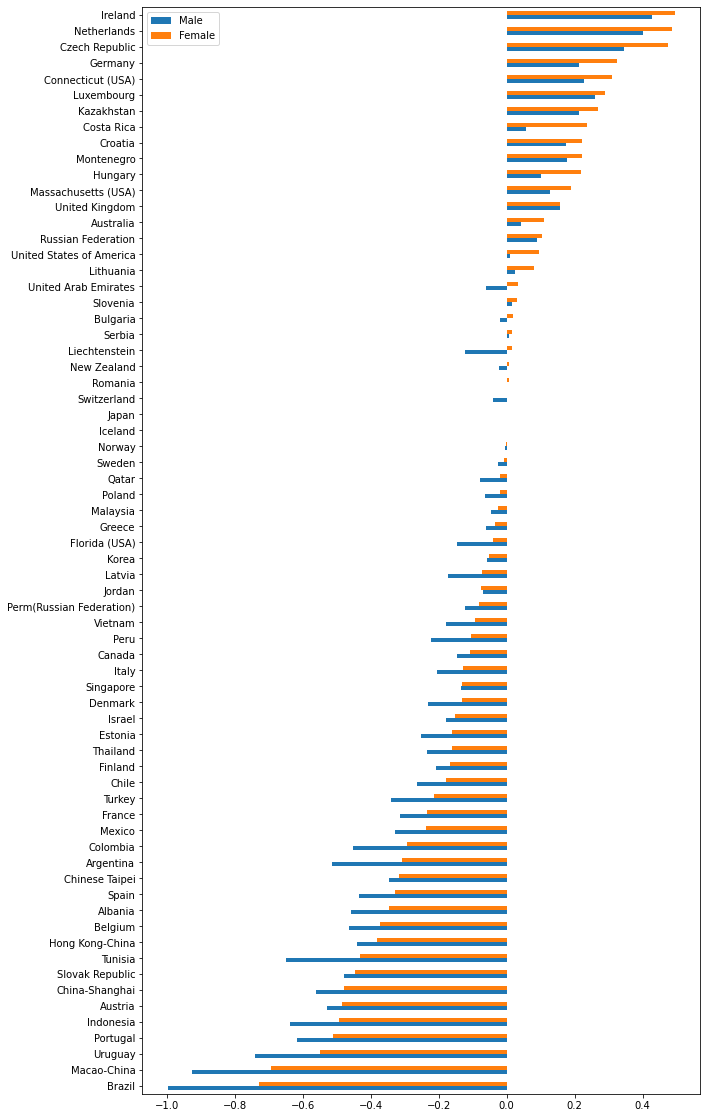

In [70]:
#plotting a clustered bar chart of female versus male mean grade index by country
sorted = data_cntry.sort_values(by=['Female']) #sorting my dataset by females mean grade index per country
g = sorted.plot(kind = 'barh', figsize=(10, 20))
plt.legend()

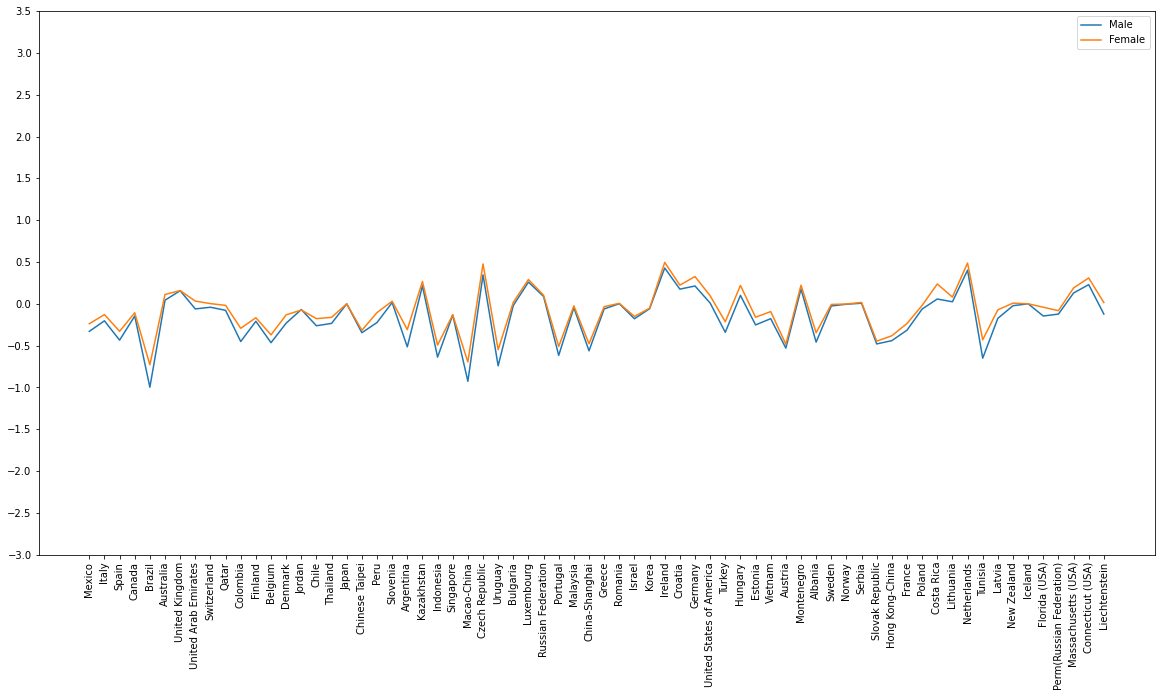

In [838]:
#plotting the same data but using the line plot
bin_y = np.arange(-3, 4, 0.5)
bin_ynames = ['{:0.2f}'.format(v) for v in bin_y]
plt.figure(figsize=(20, 10))
plt.errorbar(data = data_cntry, x = 'cntry', y = 'Male') #plotting the male mean grade index per country line plot
plt.errorbar(data = data_cntry, x = 'cntry', y = 'Female') #plotting the female mean grade index per country line plot
plt.legend()
plt.xticks(rotation = 90);
bin_loc, labels = plt.yticks()
plt.yticks(bin_y);

From the above graphs, we can notice that females generally have a higher grade index mean than males. Also, we can notice that Brazil has the lowest grade indeces for both male and female. There are more countries with negative grade index means than there are countries with positive grade index means. The most neutral country is japan having a mean index of zero for both males and females.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I have noticed that mostly the females have a higher mean of grade index than males throughout all of the observed countries. This feature strengthened our first interpretation of gender versus grade index in the bivariate section where we noticed that females have slightly better grade indeces than males, in general. 

### Were there any interesting or surprising interactions between features?

What's surprising though is the consistent slight outperformance of females. This was unexpected as I expected to find no definite trend in grade indeces between the two genders.